In [1]:
import torch 
import sys
sys.path.append('..')
from torch import nn 
from torch.nn import functional as F
from torch import optim
from utils.new_loader import load,PairSetMNIST,Training_set,Test_set, Training_set_split,Validation_set
from torch.utils.data import Dataset, DataLoader

In [14]:
# load the dataset as a Dataset object
data = PairSetMNIST( rotate = False , translate = True ,swap_channel = False)
train_data = Training_set(data)
test_data = Test_set(data)
print(train_data.train_input.shape)
print(test_data.test_input.shape)

torch.Size([5000, 2, 14, 14])
torch.Size([1000, 2, 14, 14])


tensor([2, 2])
tensor([2, 2])
tensor([2, 2])
tensor([2, 2])
tensor([2, 2])
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)


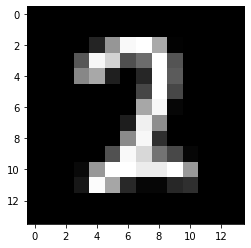

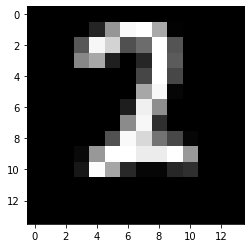

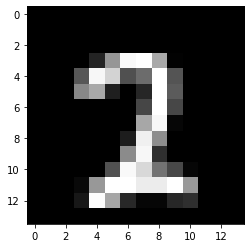

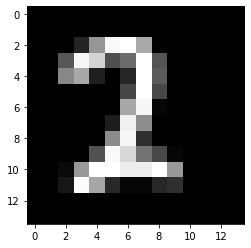

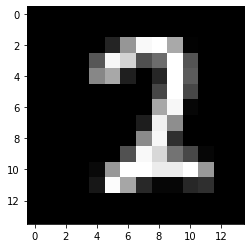

In [17]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure()
plt.imshow(train_data.train_input[0,0],cmap='gray')
plt.figure()
plt.imshow(train_data.train_input[1000,0],cmap='gray')
plt.figure()
plt.imshow(train_data.train_input[2000,0],cmap='gray')
plt.figure()
plt.imshow(train_data.train_input[3000,0],cmap='gray')
plt.figure()
plt.imshow(train_data.train_input[4000,0],cmap='gray')

print(train_data.train_classes[0])
print(train_data.train_classes[1000])
print(train_data.train_classes[2000])
print(train_data.train_classes[3000])
print(train_data.train_classes[4000])
print(train_data.train_target[0])
print(train_data.train_target[1000])
print(train_data.train_target[2000])
print(train_data.train_target[3000])
print(train_data.train_target[4000])

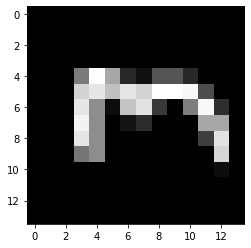

In [119]:
h,w = training_data.train_input[0,1].shape

empty_img = torch.zeros(h,w)

#for i in range(h):
    #for j in range(w):
        #empty_img[i,j] = training_data.train_input[0,1][j,i]
        #empty_img = empty_img[0:h,0:w]
empty_img90= torch.rot90(training_data.train_input[0,1])

plt.imshow(empty_img90,cmap='gray')

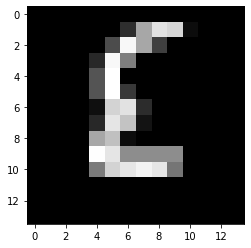

In [120]:
empty_img = torch.zeros(h,w)

#for i in range(h):
    #for j in range(w):
        #empty_img[i,j] = training_data.train_input[0,1][h-j-1,w-i-1]
        #empty_img = empty_img[0:h,0:w]

empty_img180= torch.rot90(empty_img90)
plt.imshow(empty_img180,cmap='gray')

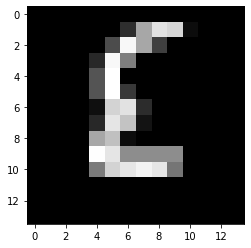

In [29]:
empty_img = torch.zeros(h,w)

for i in range(h):
    for j in range(w):
        empty_img[i,j] = training_data.train_input[0,1][h-i-1,w-j-1]
        #empty_img = empty_img[0:h,0:w]

plt.imshow(empty_img,cmap='gray')

In [30]:
img = training_data.train_input[0,1].numpy()


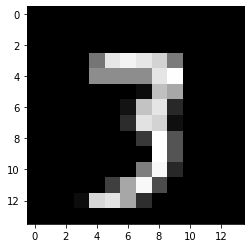

In [33]:
plt.imshow(img,cmap='gray')

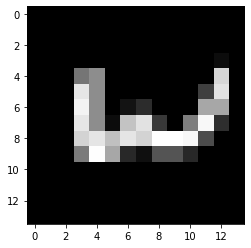

In [40]:
h,w = img.shape

empty_img = np.zeros([h,w])

for i in range(h):
    for j in range(w):
        empty_img[i,j] = img[j,i]
        
empty_img[i,j] = empty_img[j,i]

plt.imshow(empty_img,cmap='gray')

torch.Size([14, 14])


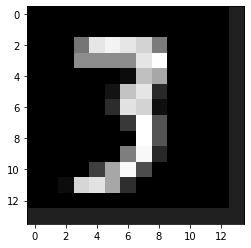

In [86]:
emptyimg = torch.zeros(h,w)
emptyimg[:-1,:-1] = training_data.train_input[0,1][1:,1:]
print(training_data.train_input[0,1].shape)

plt.imshow(emptyimg,cmap='gray')

In [209]:
a = torch.tensor([[1,2,7],[3,4,9],[6,5,0]])
print(a)


tensor([[1, 2, 7],
        [3, 4, 9],
        [6, 5, 0]])


In [216]:
b =torch.zeros(3,3)
b[1:,:] = a[:-1,:]
#b[2,:2] =a[1:,0].flip(0)
#b[:2,2] = a[0,1:].flip(0)
#b[2,2] =a[0,0]

In [217]:
print(b)

tensor([[0., 0., 0.],
        [1., 2., 7.],
        [3., 4., 9.]])


torch.Size([1000, 2, 14, 14])
tensor([[-0.4653, -0.4653, -0.4653, -0.4653, -0.4653, -0.4653, -0.4653, -0.4653,
         -0.4653, -0.4653, -0.4653, -0.4653, -0.4653, -0.4653],
        [-0.4672, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672,
         -0.4672, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672],
        [-0.4672, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672,  0.7175,
          0.3203, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672],
        [-0.4672, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672,  0.1321,  3.0485,
          1.3865, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672],
        [-0.4672, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672,  1.9997,  2.8847,
         -0.1396, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672],
        [-0.4672, -0.4672, -0.4672, -0.4672, -0.4672,  0.2088,  3.0659,  1.6408,
         -0.4672, -0.4672, -0.4672, -0.4672, -0.4672, -0.4672],
        [-0.4672, -0.4672, -0.4672, -0.4672, -0.4672,  1.7384,  2.9858,  0.0381,
         -0.0700,  

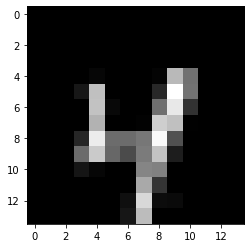

In [247]:
emptyimg = torch.zeros(training_data.train_input.shape)
print(emptyimg.shape)
emptyimg[:,:,1:,:] = training_data.train_input[:,:,:-1,:]
emptyimg[:,:,0,:] = -0.4653
print(emptyimg[1,0])
plt.imshow(emptyimg[0,0],cmap='gray')

torch.Size([1000, 2, 14, 14])


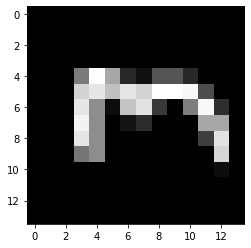

In [125]:
empty_images90= torch.rot90(training_data.train_input,1,[2,3])
print(empty_images90.shape)
plt.imshow(empty_images90[0,1],cmap='gray')

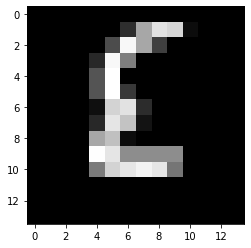

In [127]:
empty_images180 = torch.rot90(training_data.train_input,2,[2,3])
plt.imshow(empty_images180[0,1],cmap='gray')

In [128]:
print(training_data.train_classes.shape)

torch.Size([1000, 2])


In [129]:
print(training_data.train_classes[0])

tensor([9, 3])


In [194]:
a = torch.tensor([[1,2,7],[3,4,9],[6,9,9]])
print(a)
indices = (a == 9) 
index = indices.nonzero()
#indices = indices.float()
print(index)

tensor([[1, 2, 7],
        [3, 4, 9],
        [6, 9, 9]])
tensor([[1, 2],
        [2, 1],
        [2, 2]])


In [197]:
a[index[:,0],index[:,1]]

tensor([9, 9, 9])

torch.Size([1000, 2, 14, 14])


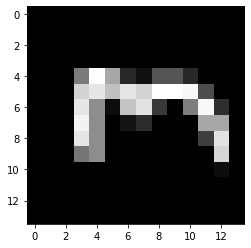

In [198]:
empty_images90= torch.rot90(training_data.train_input,1,[2,3])
print(empty_images90.shape)
plt.imshow(empty_images90[0,1],cmap='gray')

In [199]:
indices = (training_data.train_classes == 9)

In [200]:
index = indices.nonzero()
print(index)

tensor([[  0,   0],
        [  3,   0],
        [  6,   1],
        [  9,   0],
        [  9,   1],
        [ 26,   1],
        [ 29,   0],
        [ 35,   0],
        [ 51,   0],
        [ 61,   1],
        [ 67,   1],
        [ 71,   1],
        [ 74,   0],
        [ 81,   0],
        [ 84,   0],
        [ 84,   1],
        [ 86,   1],
        [ 88,   1],
        [ 91,   0],
        [ 99,   1],
        [100,   1],
        [109,   0],
        [129,   1],
        [136,   1],
        [144,   1],
        [148,   1],
        [158,   1],
        [160,   1],
        [162,   0],
        [163,   0],
        [173,   0],
        [175,   1],
        [177,   1],
        [183,   0],
        [186,   1],
        [187,   0],
        [192,   0],
        [196,   0],
        [201,   0],
        [211,   1],
        [212,   0],
        [215,   0],
        [227,   0],
        [230,   1],
        [237,   0],
        [243,   0],
        [247,   0],
        [248,   0],
        [251,   0],
        [255,   1],


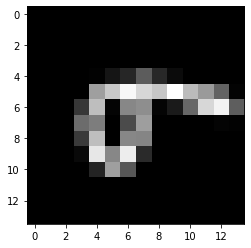

In [201]:
plt.imshow(empty_images90[0,0],cmap='gray')

In [202]:
empty_images90[index[:,0],index[:,1]] = training_data.train_input[index[:,0],index[:,1]]

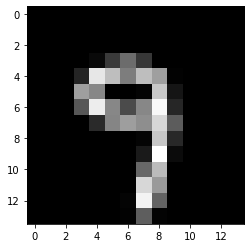

In [203]:
plt.imshow(empty_images90[0,0],cmap='gray')

In [204]:
training_data.train_input.shape

torch.Size([1000, 2, 14, 14])

In [206]:
r = torch.empty(training_data.train_input.shape)
print(r.shape)

torch.Size([1000, 2, 14, 14])
